# Predicting House Prices by Scikit-learn

# Fire up packages

In [15]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.cross_validation import train_test_split
import numpy

# Load Data

In [2]:
Data = pandas.read_csv('home_data.csv')

In [3]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Slicing

In [4]:
train_data, test_data = train_test_split(Data, test_size = 0.2)
del train_data['id']
del train_data['date']
del test_data['id']
del test_data['date']

**Since I have done pretty much work on data exploration in RStudio and GraphLab versions, I will skip this step in this version and focus on model building and evaluation**

# Spliting Predictors and Target

In [6]:
Predictors = train_data.ix[:,1:]
Test_Predictors = test_data.ix[:,1:]


# Try Six Different Regressors with for-loop

## Fire up Regressors

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Build a Regressor List

In [20]:
Regressors = [
    # Linear Regression
    LinearRegression(),
    # Random Forest with 250 iterations
    RandomForestRegressor(n_estimators = 250),
    # Random Forest with 400 iterations
    RandomForestRegressor(n_estimators = 400),
    # Lasso Model
    Lasso(),
    # Decision Tree Regressor
    DecisionTreeRegressor(),
    # Gradient Boosting with 250 iterations and fast learning rate
    GradientBoostingRegressor(n_estimators= 250,learning_rate= 0.4),
    # Gradient Boosting with 400 iterations and relatively slow learning rate
     GradientBoostingRegressor(n_estimators= 800,learning_rate= 0.1)
]

In [21]:
RMSE_Group = []
Name_Group = []
for regressor in Regressors:
    Model = regressor.fit(Predictors,train_data['price'])
    prediction = Model.predict(Test_Predictors)
    RMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(test_data['price'],prediction))
    Name = regressor.__class__.__name__
    RMSE_Group.append(RMSE)
    Name_Group.append(Name)

# Results

                     Model           RMSE
0         LinearRegression  192904.476544
1         rf with 250 iter  124789.369139
2         rf with 400 iter  124919.156490
3                    Lasso  192903.395466
4  Decision Tree Regressor  159923.626724
5   Boosting with 250 iter  129074.988096
6   Boosting with 800 iter  128106.007696


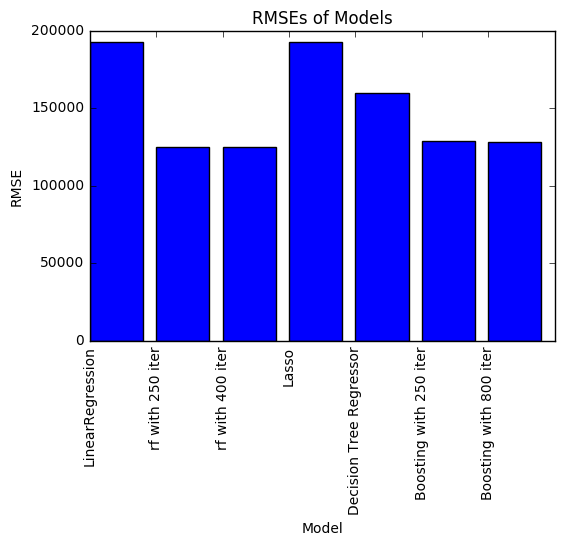

In [40]:
Name_Group[1] = 'rf with 250 iter'
Name_Group[2] = 'rf with 400 iter'
Name_Group[4] = 'Decision Tree Regressor'
Name_Group[5] = 'Boosting with 250 iter'
Name_Group[6] = 'Boosting with 800 iter'
Dic = {'Model':Name_Group,'RMSE': RMSE_Group}
df= pandas.DataFrame(Dic)
print(df)
Index = [1,2,3,4,5,6,7]
plt.bar(Index,df['RMSE'])
plt.xticks(Index, df['Model'],rotation='vertical')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.title('RMSEs of Models')

# Concluding Remark

Following concluding remarks can be made based on the above result:

1: If you check the result of Lasso Regression and linear regression, you can find that the difference is almost ignorable. This proves that there is almost no multicolinearity existing among features.

2: Random Forest and Gradient Boosting are still two powerful models, but I believe that there are still potentials exisitng in those two models.